# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

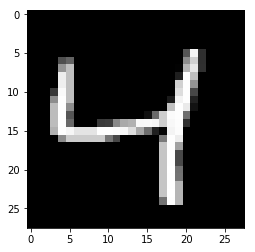

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6933
Epoch: 1/20... Training loss: 0.6894
Epoch: 1/20... Training loss: 0.6852
Epoch: 1/20... Training loss: 0.6807
Epoch: 1/20... Training loss: 0.6752
Epoch: 1/20... Training loss: 0.6692
Epoch: 1/20... Training loss: 0.6607
Epoch: 1/20... Training loss: 0.6517
Epoch: 1/20... Training loss: 0.6416
Epoch: 1/20... Training loss: 0.6301
Epoch: 1/20... Training loss: 0.6152
Epoch: 1/20... Training loss: 0.5997
Epoch: 1/20... Training loss: 0.5851
Epoch: 1/20... Training loss: 0.5699
Epoch: 1/20... Training loss: 0.5532
Epoch: 1/20... Training loss: 0.5351
Epoch: 1/20... Training loss: 0.5177
Epoch: 1/20... Training loss: 0.5014
Epoch: 1/20... Training loss: 0.4793
Epoch: 1/20... Training loss: 0.4631
Epoch: 1/20... Training loss: 0.4456
Epoch: 1/20... Training loss: 0.4328
Epoch: 1/20... Training loss: 0.4132
Epoch: 1/20... Training loss: 0.4035
Epoch: 1/20... Training loss: 0.3874
Epoch: 1/20... Training loss: 0.3741
Epoch: 1/20... Training loss: 0.3678
E

Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1843
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1883
E

Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1463
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1470
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1446
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1466
Epoch: 2/20... Training loss: 0.1431
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1462
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1496
E

Epoch: 3/20... Training loss: 0.1274
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1281
Epoch: 3/20... Training loss: 0.1240
Epoch: 3/20... Training loss: 0.1266
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1277
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1285
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1247
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1246
Epoch: 3/20... Training loss: 0.1242
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1273
Epoch: 3/20... Training loss: 0.1269
E

Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1118
E

Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1047
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1049
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1082
E

Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.0992
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.0999
Epoch: 6/20... Training loss: 0.1005
E

Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0961
Epoch: 7/20... Training loss: 0.0961
E

Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1032
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0920
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0975
E

Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0948
E

Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0901
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0891
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0977
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

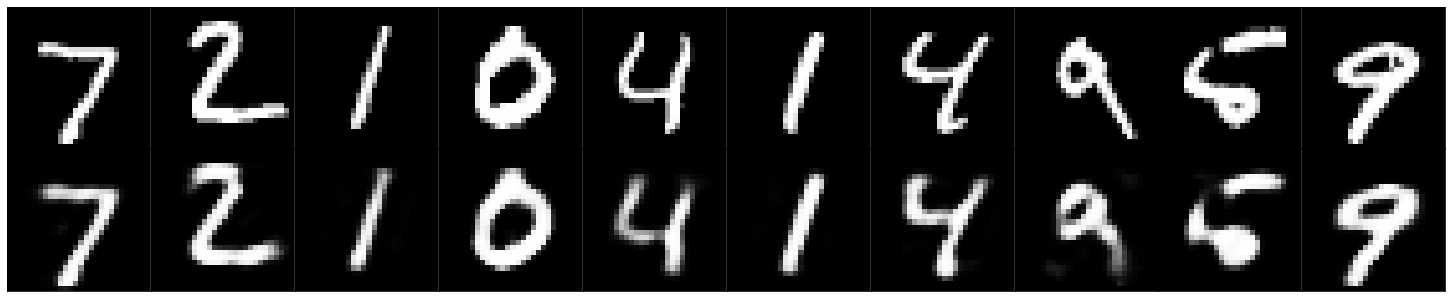

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.